### Perceptron on Scikit-Learn

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [2]:
iris = load_iris()

X = iris.data[:, (2, 3)]
y = (iris.target == 0).astype(np.int64)

In [3]:
perceptron_clf = Perceptron()
perceptron_clf.fit(X, y)

y_pred = perceptron_clf.predict([[2, 0.5]])

In [4]:
y_pred

array([0])

### TensorFlow, Keras & Outros

#### Explorando o dataset de imagens

In [ ]:
import tensorflow as tf
from tensorflow import keras

2024-12-16 09:34:06.856977: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-16 09:34:06.859947: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-16 09:34:06.868284: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1734352446.885687   46629 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1734352446.892191   46629 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-16 09:34:06.910603: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [6]:
tf.__version__

'2.18.0'

In [7]:
keras.__version__

'3.7.0'

In [8]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [9]:
X_train_full.shape

(60000, 28, 28)

In [10]:
X_train_full.dtype

dtype('uint8')

In [11]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [12]:
class_name = ['T-shirt/top',
              'Trouser',
              'Pullover',
              'Dress',
              'Coat',
              'Sandal',
              'Shirt',
              'Sneaker',
              'Bag',
              'Ankle boot']

In [13]:
class_name[y_train[0]]

'Coat'

#### Classificação

In [14]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

/home/juanvieira/local/dl/env/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2024-12-16 09:34:08.976818: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [17]:
hidden1 = model.layers[1]

In [18]:
hidden1.name

'dense'

In [19]:
model.get_layer('dense_2')

<Dense name=dense_2, built=True>

In [20]:
w, b = hidden1.get_weights()

In [21]:
w

array([[-0.00731348,  0.01724152, -0.04491711, ...,  0.07251896,
        -0.07155746,  0.00329386],
       [ 0.03678031, -0.02513534,  0.03675881, ...,  0.00233477,
        -0.00669751,  0.04513679],
       [-0.0134274 , -0.06129745,  0.00246512, ...,  0.01603162,
         0.06023189, -0.02723245],
       ...,
       [ 0.00059929, -0.06752558, -0.01225808, ...,  0.00310022,
        -0.05873314, -0.02454619],
       [ 0.02692056,  0.05555123,  0.06561325, ..., -0.00725439,
        -0.01302932,  0.06339383],
       [-0.01297066,  0.07151005,  0.07118033, ..., -0.00406887,
         0.07373722,  0.01150036]], dtype=float32)

In [22]:
w.shape

(784, 300)

In [23]:
b

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [24]:
b.shape

(300,)

In [25]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=keras.optimizers.SGD(learning_rate=.001),
    metrics=['accuracy']
)

In [26]:
history = model.fit(
    X_train,
    y_train,
    epochs=30,
    validation_data=(X_valid, y_valid)
)

Epoch 1/30


2024-12-16 09:34:09.528179: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 172480000 exceeds 10% of free system memory.


1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4550 - loss: 1.7846 - val_accuracy: 0.7030 - val_loss: 0.9661
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7188 - loss: 0.9035 - val_accuracy: 0.7608 - val_loss: 0.7467
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7712 - loss: 0.7291 - val_accuracy: 0.7922 - val_loss: 0.6533
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7898 - loss: 0.6568 - val_accuracy: 0.8060 - val_loss: 0.6004
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8061 - loss: 0.6035 - val_accuracy: 0.8188 - val_loss: 0.5667
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8108 - loss: 0.5772 - val_accuracy: 0.8248 - val_loss: 0.5414
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8204 - loss: 0.5454 - val_accuracy: 0.8280 - val_loss: 0.5208
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8241 - loss: 0.5249 - val_accurac

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

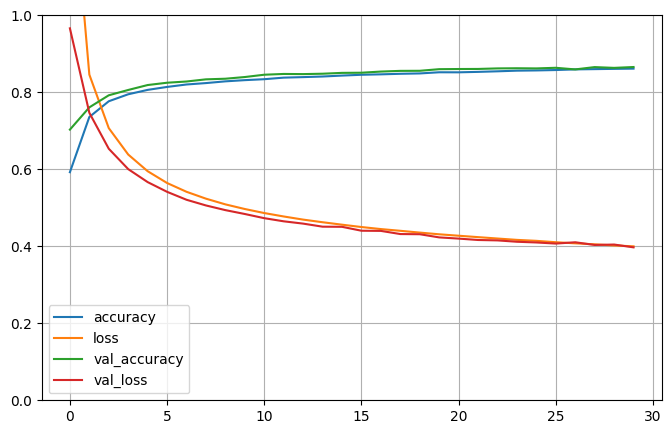

In [28]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [29]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8184 - loss: 70.5581


[75.50708770751953, 0.8118000030517578]

In [30]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [31]:
y_pred = np.argmax(model.predict(X_new), axis=1)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


array([9, 2, 1])

In [32]:
np.array(class_name)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

#### Regressão

In [33]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [34]:
housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target
)

X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full
)

In [35]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [36]:
regression_model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

/home/juanvieira/local/dl/env/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [37]:
regression_model.compile(
    loss='mean_squared_error',
    optimizer=keras.optimizers.SGD()
)

In [38]:
regression_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 30)             │           270 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 301 (1.18 KB)

 Trainable params: 301 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
regression_history = regression_model.fit(X_train, y_train, epochs=20,
                                          validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2313 - val_loss: 2.0572
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4365 - val_loss: 1.1148
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4175 - val_loss: 0.4174
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4013 - val_loss: 0.4642
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3903 - val_loss: 0.4320
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3874 - val_loss: 0.4146
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3718 - val_loss: 0.3822
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3646 - val_loss: 0.4645
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4060 - val_loss: 0.3809
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3632 - val_loss: 0.4084
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3577 - val_loss: 0.4250
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

In [40]:
mse_test = regression_model.evaluate(X_test, y_test)
mse_test

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step - loss: 0.3611


0.3798362612724304

In [41]:
X_new = X_test[:3]
y_pred = regression_model.predict(X_new)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


array([[5.5856924 ],
       [0.50902313],
       [0.77563787]], dtype=float32)

In [42]:
# DNN

input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation='relu')(input_)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat_ = keras.layers.Concatenate()([input_, hidden2])
output_ = keras.layers.Dense(1)(concat_)
regression_model = keras.Model(inputs=[input_], outputs=[output_])

In [43]:
# DNN (multi inputs)

input_A = keras.layers.Input(shape=[5], name='wide_input')
input_B = keras.layers.Input(shape=[6], name='deep_input')
hidden1_ = keras.layers.Dense(30, activation='relu')(input_B)
hidden2_ = keras.layers.Dense(30, activation='relu')(hidden1_)
concat_all = keras.layers.concatenate([input_A, hidden2_])
output_2 = keras.layers.Dense(1, name='output')(concat_all)
regression_model_2 = keras.Model(inputs=[input_A, input_B], outputs=[output_2])

In [44]:
regression_model_2.compile(
    loss='mse',
    optimizer=keras.optimizers.SGD(learning_rate=1e-3)
)

In [45]:
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

In [46]:
history_2 = regression_model_2.fit(
    (X_train_A, X_train_B), y_train,
    epochs=20,
    validation_data=((X_valid_A, X_valid_B), y_valid)
)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.6918 - val_loss: 0.8753
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7779 - val_loss: 0.6888
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6488 - val_loss: 0.6157
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5800 - val_loss: 0.5830
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5668 - val_loss: 0.5492
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5464 - val_loss: 0.5204
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5293 - val_loss: 0.5227
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4852 - val_loss: 0.4863
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4754 - val_loss: 0.4805
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4527 - val_loss: 0.4675
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4406 - val_loss: 0.4578
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

In [47]:
mse_test_2 = regression_model_2.evaluate((X_test_A, X_test_B), y_test)
mse_test_2

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step - loss: 0.4311


0.4442250728607178

In [48]:
y_pred_2 = regression_model_2.predict((X_new_A, X_new_B))
y_pred_2

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


array([[7.15948   ],
       [0.82521415],
       [0.6143718 ]], dtype=float32)

In [49]:
# DNN (multi inputs) + output extra

input_A = keras.layers.Input(shape=[5], name='wide_input')
input_B = keras.layers.Input(shape=[6], name='deep_input')
hidden1_ = keras.layers.Dense(30, activation='relu')(input_B)
hidden2_ = keras.layers.Dense(30, activation='relu')(hidden1_)
concat_all = keras.layers.concatenate([input_A, hidden2_])
output_2 = keras.layers.Dense(1, name='output')(concat_all)
aux_output = keras.layers.Dense(1, name='aux_output')(hidden2_)
regression_model_2 = keras.Model(inputs=[input_A, input_B], outputs=[output_2, aux_output])

In [67]:
regression_model_2.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ deep_input          │ (None, 6)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_10 (Dense)    │ (None, 30)        │        210 │ deep_input[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ wide_input          │ (None, 5)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_11 (Dense)    │ (None, 30)        │        930 │ dense_10[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 35)        │          0 │ wide_input[0][0], │
│ (Concatenate)       │                   │            │ dense_11[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output (Dense)      │ (None, 1)         │         36 │ concatenate_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ aux_output (Dense)  │ (None, 1)         │         31 │ dense_11[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,209 (4.73 KB)

 Trainable params: 1,207 (4.71 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [50]:
regression_model_2.compile(
    loss=['mse', 'mse'],
    loss_weights=[0.9, 0.1],
    optimizer=keras.optimizers.SGD(learning_rate=1e-3)
)

In [51]:
checkpoint_cb = keras.callbacks.ModelCheckpoint(
    'my_first_keras_model.keras',
    save_best_only=True
)

##### Using Callbacks

In [52]:
from gc import callbacks

history_2 = regression_model_2.fit(
    [X_train_A, X_train_B],
    [y_train, y_train],
    epochs=20,
    callbacks=[checkpoint_cb],
    validation_data=(
        [X_valid_A, X_valid_B],
        [y_valid, y_valid]
        )
)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - aux_output_loss: 5.0212 - loss: 2.5444 - output_loss: 2.2692 - val_aux_output_loss: 6.1059 - val_loss: 2.0203 - val_output_loss: 1.5658
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - aux_output_loss: 3.0397 - loss: 1.1575 - output_loss: 0.9484 - val_aux_output_loss: 6.1907 - val_loss: 1.4172 - val_output_loss: 0.8864
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - aux_output_loss: 2.1031 - loss: 0.8860 - output_loss: 0.7507 - val_aux_output_loss: 6.0510 - val_loss: 1.2482 - val_output_loss: 0.7142
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - aux_output_loss: 1.9090 - loss: 0.7979 - output_loss: 0.6745 - val_aux_output_loss: 5.6670 - val_loss: 1.1521 - val_output_loss: 0.6501
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - aux_output_loss: 1.7218 - loss: 0.7353 - output_loss: 0.6257 - val_aux_output_loss: 5.1714 - val_loss: 1.0661 - val_output_loss: 0.6096
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/ste

In [53]:
# Checkpoints + Saving only the best model

checkpoint_cb = keras.callbacks.ModelCheckpoint(
    'my_first_keras_model.keras',
    save_best_only=True
)

In [54]:
# Early Stop + Restore best weights

early_stopping_cb = keras.callbacks.EarlyStopping(
    patience=10,
    restore_best_weights=True
)

In [55]:
from gc import callbacks
history_2 = regression_model_2.fit(
    [X_train_A, X_train_B],
    [y_train, y_train],
    epochs=20,
    callbacks=[checkpoint_cb, early_stopping_cb],
    validation_data=(
        [X_valid_A, X_valid_B],
        [y_valid, y_valid]
        )
)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - aux_output_loss: 1.1729 - loss: 0.4961 - output_loss: 0.4209 - val_aux_output_loss: 1.4776 - val_loss: 0.5534 - val_output_loss: 0.4506
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - aux_output_loss: 1.1610 - loss: 0.4870 - output_loss: 0.4121 - val_aux_output_loss: 1.4119 - val_loss: 0.5600 - val_output_loss: 0.4652
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - aux_output_loss: 1.1009 - loss: 0.4777 - output_loss: 0.4084 - val_aux_output_loss: 1.3511 - val_loss: 0.5532 - val_output_loss: 0.4644
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - aux_output_loss: 1.1068 - loss: 0.4753 - output_loss: 0.4051 - val_aux_output_loss: 1.2958 - val_loss: 0.5476 - val_output_loss: 0.4644
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - aux_output_loss: 1.1077 - loss: 0.4896 - output_loss: 0.4210 - val_aux_output_loss: 1.2446 - val_loss: 0.5327 - val_output_loss: 0.4535
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/ste

In [56]:
total_loss, main_loss, aux_loss = regression_model_2.evaluate(
    [X_test_A, X_test_B], [y_test, y_test]
)

print('Total Loss: {}'.format(total_loss))
print('Main Loss: {}'.format(main_loss))
print('Aux. Loss: {}'.format(aux_loss))

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step - aux_output_loss: 0.8756 - loss: 0.4533 - output_loss: 0.4064
Total Loss: 0.46709898114204407
Main Loss: 0.4196644425392151
Aux. Loss: 0.8786544799804688


In [57]:
y_pred_main, y_pred_aux = regression_model_2.predict(
    [X_new_A, X_new_B]
)

print('Main Predictions: {}'.format(y_pred_main))
print('Aux. Predictions: {}'.format(y_pred_aux))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Main Predictions: [[6.805734 ]
 [0.6997943]
 [0.5469516]]
Aux. Predictions: [[3.0823705]
 [1.5818622]
 [1.6401212]]


In [58]:
regression_model_2.save('keras_regression_model.keras')

In [59]:
# Custom Callback (Personalizada)

class PrintTrainRatioCallBack(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    print("\nval/train: {:.2f}".format(logs['val_loss']/logs['loss']))

In [60]:
# Subclassing

class WideAndDeepModel(keras.Model):
  def __init__(self, units=30, activation='relu', **kwargs):
    super().__init__(**kwargs)
    self.hidden1 = keras.layers.Dense(units, activation=activation)
    self.hidden2 = keras.layers.Dense(units, activation=activation)
    self.main_output = keras.layers.Dense(1)
    self.aux_output = keras.layers.Dense(1)

  def call(self, inputs):
    input_A, input_B = inputs
    hidden1 = self.hidden1(input_B)
    hidden2 = self.hidden2(hidden1)
    concat = keras.layers.concatenate([input_A, input_B])
    main_output = self.main_output(concat)
    aux_output = self.aux_output(hidden2)
    return main_output, aux_output

# Usar assim
subclass_model = WideAndDeepModel()

#### Tensorboard

In [61]:
# DNN

input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation='relu')(input_)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat_ = keras.layers.Concatenate()([input_, hidden2])
output_ = keras.layers.Dense(1)(concat_)
regression_model_3 = keras.Model(inputs=[input_], outputs=[output_])

In [62]:
regression_model_3.compile(
    loss='mse',
    optimizer=keras.optimizers.SGD(learning_rate=1e-3)
)

In [63]:
import os

root_logdir = os.path.join(os.curdir, 'my_logs')

def get_run_logdir():
  import time
  run_id = time.strftime('run_%Y_%m_%D-%H_%M_%S')
  return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

In [64]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history_3 = regression_model_3.fit(
    X_train, y_train,
    epochs=30,
    validation_data=(X_valid, y_valid),
    callbacks=[tensorboard_cb]
)

Epoch 1/30
  1/363 ━━━━━━━━━━━━━━━━━━━━ 1:16 210ms/step - loss: 3.4734

/home/juanvieira/local/dl/env/lib/python3.11/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_28']
Received: inputs=Tensor(shape=(None, 8))
  warnings.warn(msg)


363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.2455 - val_loss: 3.0399
Epoch 2/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7541 - val_loss: 0.7230
Epoch 3/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6421 - val_loss: 0.6226
Epoch 4/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5626 - val_loss: 0.6319
Epoch 5/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5574 - val_loss: 0.5234
Epoch 6/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5103 - val_loss: 0.4977
Epoch 7/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5046 - val_loss: 0.5582
Epoch 8/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4759 - val_loss: 0.4779
Epoch 9/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4745 - val_loss: 0.4762
Epoch 10/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4485 - val_loss: 0.4518
Epoch 11/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4439 - val_loss: 0.4584
Epoch 12/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.

### Plotando a arquitetura das RNAs

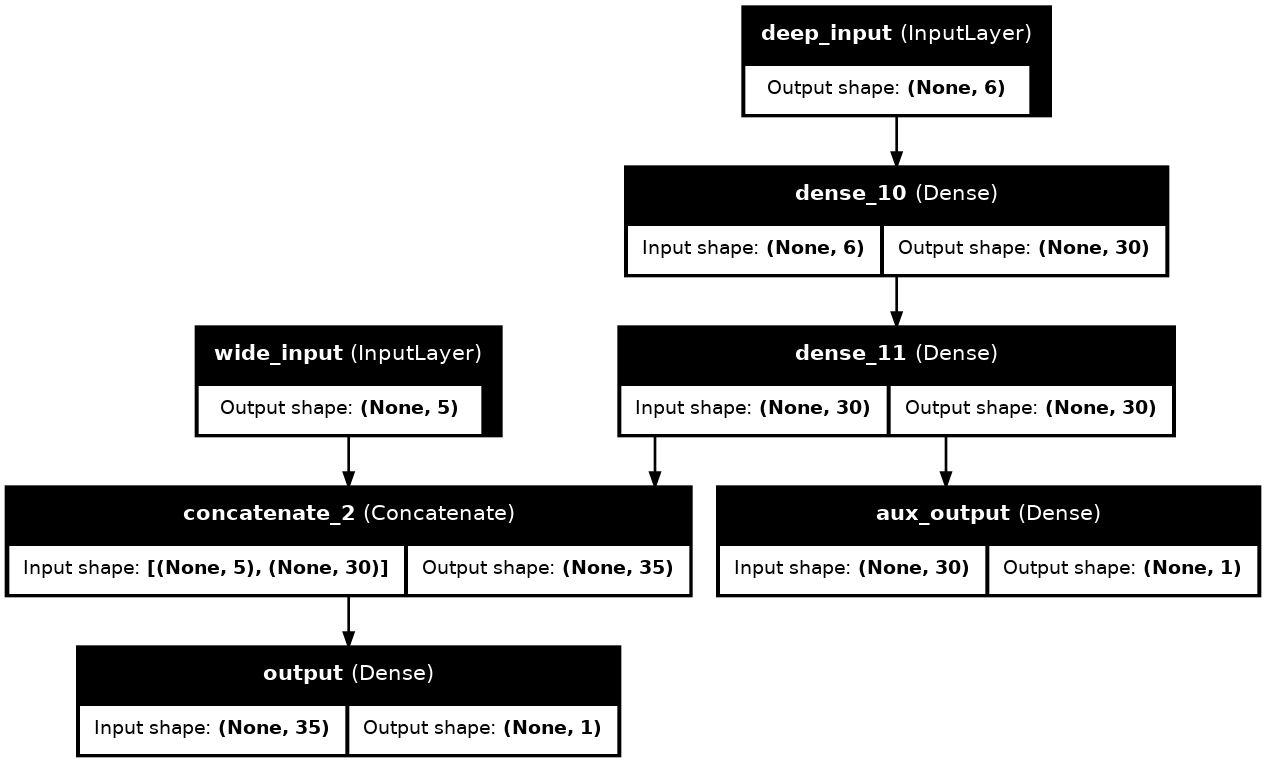

In [66]:
from tensorflow.keras.utils import plot_model


plot_model(
    regression_model_2,                                             # Modelo escolhido: multi inputs com aux. output
    to_file='../nn-architectures/multi-inputs-aux-output.png',    
    show_shapes=True,                                               # Formas dos tensores
    show_layer_names=True,                                          # Nomes das camadas
    expand_nested=False,                                            # Não expande camadas aninhadas
    dpi=96                                                          # Ajuste de Resolução
)